<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [72]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [73]:
# Load the image
image = np.array(Image.open('/content/drive/MyDrive/PR/A1/Fall-23-APML-Public-main/Fall-23-APML-Public-main/Images/lemon.jpeg'))

In [74]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of our original image:- (100, 100, 3)
(100, 100)


Text(0.5, 1.0, 'Updated image')

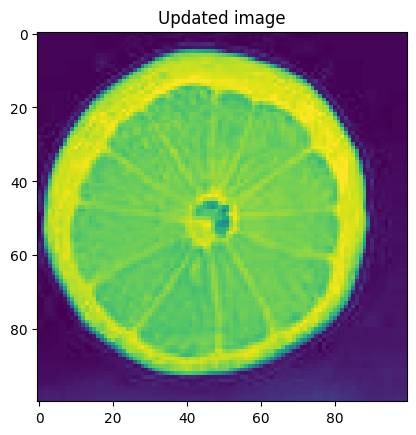

In [75]:
print("Shape of our original image:-",image.shape) #Print shape of original image

img_single_channel = image[:,:,-3] #Create the channel

print(img_single_channel.shape) #Print the shape of image channel

#Plot the channel img
plt.imshow(img_single_channel)
plt.title("Updated image")

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of average img:-  (100, 100)


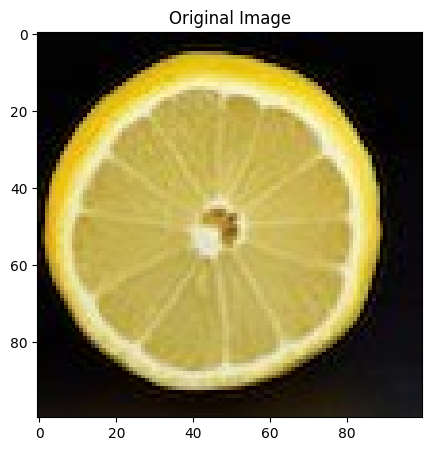

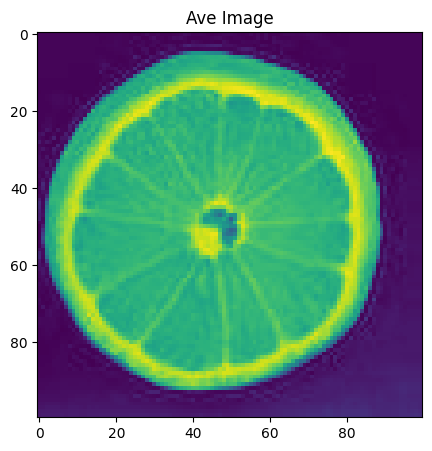

In [76]:

img_average_channel = np.mean(image, axis=2)

print("Shape of average img:- ",img_average_channel.shape)

#Plot Original
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Original Image")
#Plot average of all channel
plt.figure(figsize=(5,5))
plt.imshow(img_average_channel)
plt.title("Ave Image")

plt.show()

If we use the original image then it is more detailed and clearer while the average image has less color information due to average of colors so that original image is better.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

**Identity matrix** :- Identity matrix is one in which all of the primary diagonal members are one and all other components are zero.

In that nothing changes as a result of the multiplication, multiplying a matrix by the identity matrix is similar to multiplying a number by 1.

In [77]:

rows, columns = img_average_channel.shape # Determine the size of the identity matrix

identity_matrix = np.eye(rows, columns) # Create an identity matrix of the same size

r_index = np.random.randint(0, rows)
rand_r = identity_matrix[r_index, :]

print("Random row from identity matrix")
print(rand_r)

Random row from identity matrix
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [78]:
num_of_rows = img_average_channel.shape[0] # Get the number of rows
print(num_of_rows)

rows = np.arange(num_of_rows)

np.random.shuffle(rows) #shuffle the rows

print(rows)


100
[43  4 53 94 73 68 67 11 80 22 78 54 33 17 49 31 10 64 81 76 34 88 83 40
 27 60 63 69 96 28 98 37 36 25 91 21  9 93 45 87 12 82 41 50 51 30 72 42
  6 57  8 77 15 56 48 92 46 74 16 71 75 35  0 99  3 23 70 65 32 90 58 13
 86 26 59 19 14 52 38 18 95  7 29 24 84  5 97 44 61 79 62 39  1 20 55 66
 89 47 85  2]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [79]:
T = identity_matrix[rows]
print(T.shape) #Print the shape of T

(100, 100)


 T is simply the identity matrix with its rows rearranged in accordance with the shuffled row.

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

(100, 100)


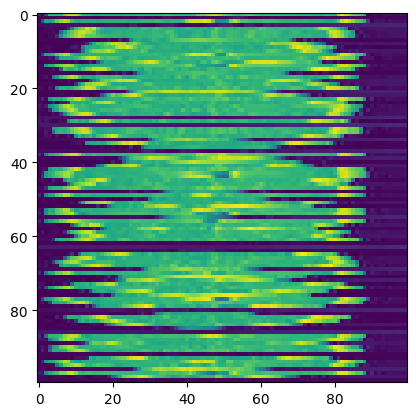

In [80]:
# Matrix multiply T and img_average_channel
transformed_image = np.matmul(T, img_average_channel)

print(transformed_image.shape)

# 2. Plot transformed_image
plt.imshow(transformed_image)

The matrix multiplication's dot products shuffle the rows of image.

The transformation effectively rearranges the image's rows, which may cause the original image to appear visually distorted. Depending on the particular shuffle carried out by matrix T, it may produce a variety of designs, such as vertical or diagonal stripes.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

One way to show that T is invertible is to check if its determinant is nonzero.

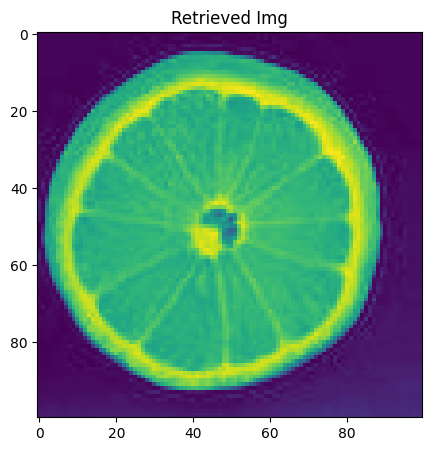

In [81]:
# Check if matrix T is invertible
if det(T) != 0:
    # Compute the inverse of matrix T
    Tinv = np.linalg.inv(T)

    # Use the inverse to perform the reverse operation
    retrieved_image = np.dot(Tinv, transformed_image)

    # Plot the retrieved image
    plt.figure(figsize=(5, 5))
    plt.imshow(retrieved_image)
    plt.title("Retrieved Img")
    plt.show()
else:
    print("not invertible.")


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

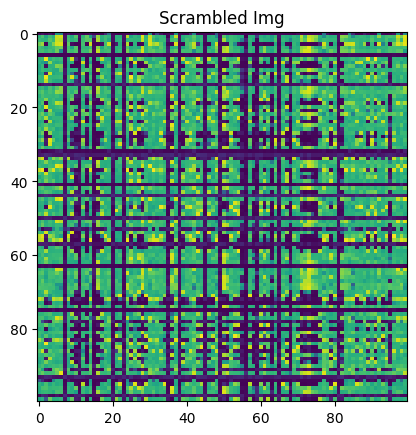

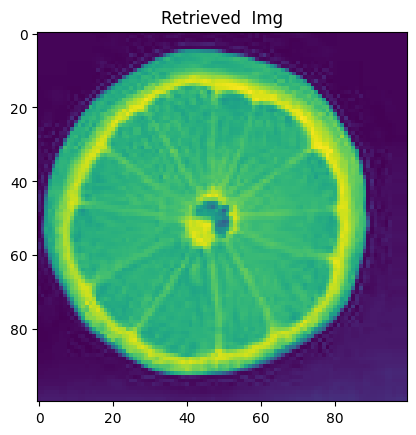

In [82]:
# Get the shape of the input img
num_rows, num_cols = img_average_channel.shape

# Random permutation of row and column indices
permutation = np.random.permutation(num_rows)
row_ind = permutation.copy()
np.random.shuffle(permutation)
col_ind = permutation

# Scramble the original ima using  indexing
scrambled_image = img_average_channel[row_ind][:, col_ind]

# Plot the scrambled ima
plt.imshow(scrambled_image)
plt.title("Scrambled Img")
plt.show()

# To unscramble, use the inverse permutation
i_r_ind = np.argsort(row_ind)
i_c_ind = np.argsort(col_ind)

retrieved_image = scrambled_image[i_r_ind][:, i_c_ind]

# Plot the Retrieved  image
plt.imshow(retrieved_image)
plt.title("Retrieved  Img")
plt.show()